In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [33]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df.shape

(5572, 5)

In [35]:
#Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [38]:
df.sample(5)

,v1,v2
4461,ham,"Sorry I flaked last night, shit's seriously go..."
3236,ham,Ron say fri leh. N he said ding tai feng cant ...
4919,ham,"G says you never answer your texts, confirm/deny"
2583,ham,"Goodmorning, today i am late for 1hr."
2488,ham,Aiyah e rain like quite big leh. If drizzling ...


In [39]:
#Rename the columns

In [40]:
df.rename(columns = {'v1':'Type', 'v2':'Text'}, inplace=True)
df.head(5)

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
df['Type'] = encoder.fit_transform(df['Type'])

In [43]:
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
# Check missing values

In [45]:
df.isnull().sum()

Type    0
Text    0
dtype: int64

In [46]:
# Check Duplicate Values
df.duplicated().sum()

403

In [47]:
# Drop duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [48]:
df.shape

(5169, 2)

In [49]:
# Exploratory Data Analysis

In [50]:
df['Type'].value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

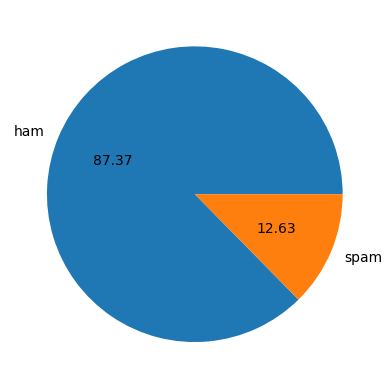

In [51]:
import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [52]:
# Data is imbalanced

In [53]:
import nltk

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Qc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
df.loc[:,'Characters'] = df['Text'].apply(len)

In [67]:
df.head()

,Type,Text,characters,Words,Sentences,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,111
1,0,Ok lar... Joking wif u oni...,29,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,155
3,0,U dun say so early hor... U c already then say...,49,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,61


In [65]:
# num of words
df.loc[:,'Words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [91]:
df.head()

,Type,Text,Words,Sentences,Characters,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [70]:
df.drop(columns = ['characters'], inplace=True)

In [71]:
df.head()

,Type,Text,Words,Sentences,Characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [61]:
df.loc[:,'Sentences'] =  df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [72]:
df.head()

,Type,Text,Words,Sentences,Characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [73]:
df[['Words','Sentences','Characters']].describe()

,Words,Sentences,Characters
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


In [74]:
#ham
df[df['Type'] == 0][['Sentences','Words','Characters']].describe()

,Sentences,Words,Characters
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [75]:
#spam
df[df['Type'] == 1][['Sentences', 'Words', 'Characters']].describe()

,Sentences,Words,Characters
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [76]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

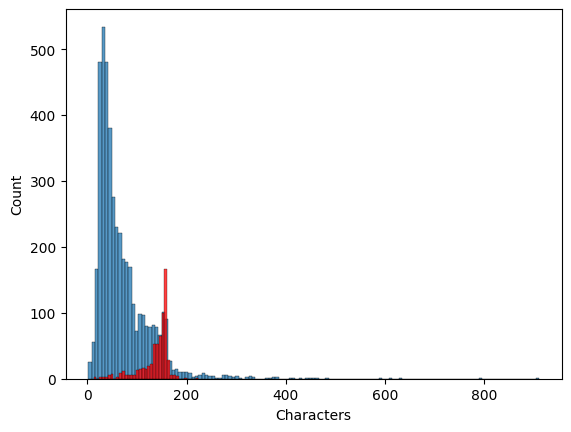

In [77]:
sns.histplot(df[df['Type'] == 0]['Characters'])
sns.histplot(df[df['Type'] == 1]['Characters'], color='red')

<Axes: xlabel='Words', ylabel='Count'>

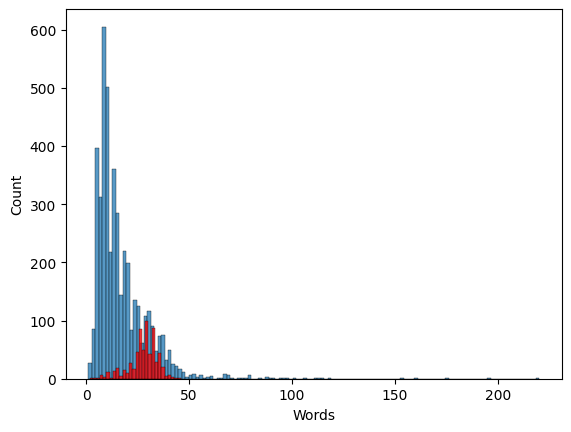

In [78]:
sns.histplot(df[df['Type'] == 0]['Words'])
sns.histplot(df[df['Type'] == 1]['Words'], color='red')

C:\Users\Qc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


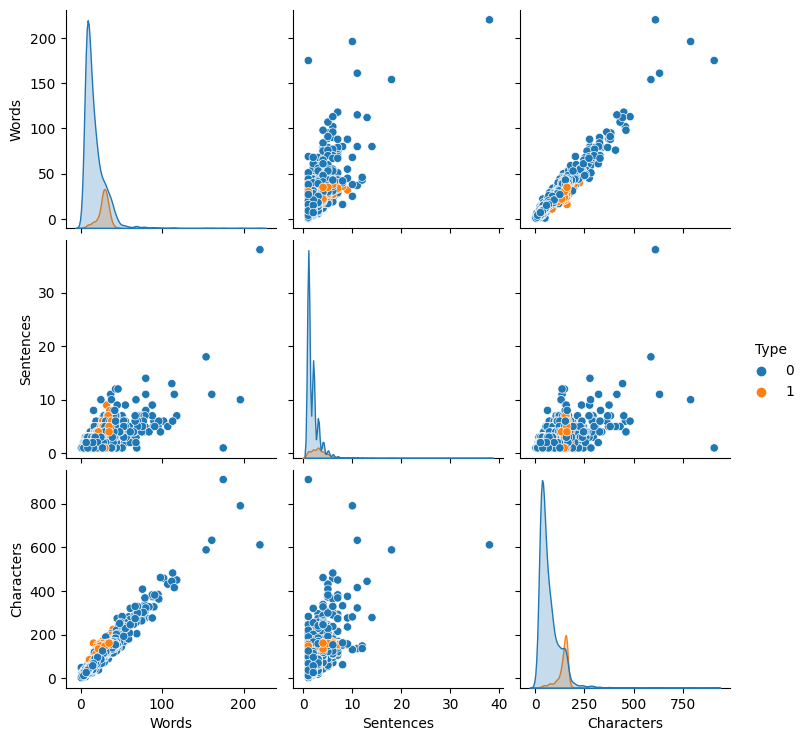

In [79]:
sns.pairplot(df, hue = 'Type')

In [ ]:
# Data Preprocessing

In [80]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [87]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [89]:
df['Transformed_text'] = df['Text'].apply(transform_text)
df.head()

,Type,Text,Words,Sentences,Characters,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [94]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

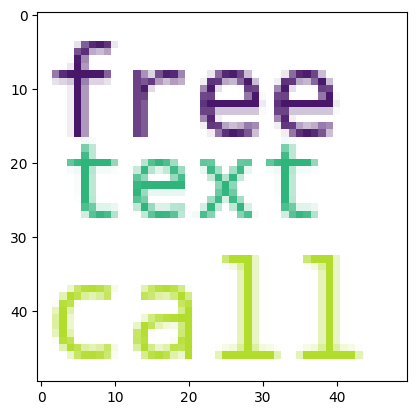

In [97]:
spam_wc = wc.generate(df[df['Type'] == 1]['Transformed_text'].str.cat(sep=""))
plt.imshow(spam_wc)

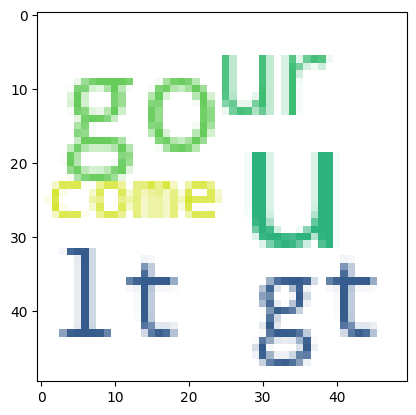

In [98]:
ham_wc = wc.generate(df[df['Type'] == 0]['Transformed_text'].str.cat(sep=""))
plt.imshow(ham_wc)

In [99]:
df.head()

,Type,Text,Words,Sentences,Characters,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [104]:
spam_corpus = []
for msg in df[df['Type'] == 1]['Transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
len(spam_corpus) 

9939

In [105]:
from collections import Counter

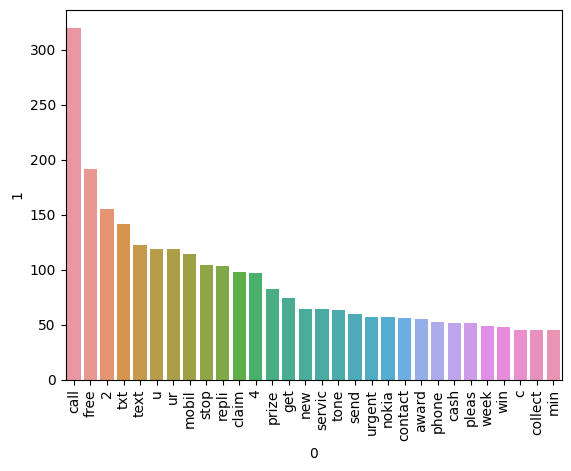

In [112]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [113]:
ham_corpus = []
for msg in df[df['Type'] == 0]['Transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
len(ham_corpus) 

35404

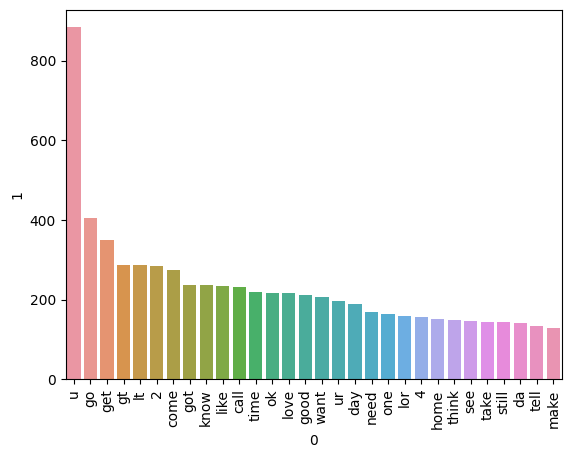

In [114]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [115]:
# Model Building

In [116]:
#Text Vectorization
#Bag of words

In [164]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [165]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [166]:
X.shape

(5169, 3000)

In [167]:
Y = df['Type'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [170]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [171]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [172]:
bnb.fit(X_train, Y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [173]:
# tfidf --> MNB

In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))